Question 2)

In [2]:
import selenium
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
# Path where you save the webdriver 
executable_path = 'C:/Users/bhaku/Desktop/study material/etsy scraper/chromedriver.exe'

# initiator the webdriver for chrome browser
driver = webdriver.Chrome(executable_path=executable_path)
driver.get("https://flightaware.com/live/aircrafttype/")
driver.set_page_load_timeout(3)

aircraft_list=["PC12","C208", "BE20","C56X"]
PC12='pilatus'
C208='cessna_caravan'
BE20='beechcraft'
C56X='cessna_citation'
aircraft_names_list=[PC12,C208,BE20,C56X]
air_dict = dict(zip( aircraft_names_list,aircraft_list))
main_df=pd.DataFrame()
for keys,x in air_dict.items():
    
    df=pd.DataFrame()
    driver.get(f"https://flightaware.com/live/aircrafttype/{x}")
    driver.set_page_load_timeout(3)
    element = driver.find_elements_by_class_name("prettyTable fullWidth")
    
    table =  driver.find_element_by_xpath("//table[@class='prettyTable fullWidth']")
    row1list=[]
    row2list=[]
    for row in table.find_elements_by_xpath(".//tr"):
        row1list.append([td.text for td in row.find_elements_by_xpath(".//td[@class='smallrow1']")])
    
    for row in table.find_elements_by_xpath(".//tr"):
        row2list.append([td.text for td in row.find_elements_by_xpath(".//td[@class='smallrow2']")])
     
    row1list = list(filter(None, row1list)) 
    row2list = list(filter(None, row2list)) 
    
    column_names=['Ident','Type','Origin','Destination','Departure','Estimated Arrival Time','Estimate Time Enroute']
    
    df1 = pd.DataFrame( row1list[0:], columns = column_names)
    df2 = pd.DataFrame( row2list[0:], columns = column_names)
    
    df=pd.concat([df1, df2]).sort_index(kind='merge')
    df["Aircraft Name"]=keys
    main_df=pd.concat([main_df,df])
    





TimeoutException: Message: timeout: Timed out receiving message from renderer: 2.735
  (Session info: chrome=86.0.4240.75)


In [8]:

main_df   

,Ident,Type,Origin,Destination,Departure,Estimated Arrival Time,Estimate Time Enroute,Aircraft Name
0,FD607,PC12,Jandakot (JAD / YPJT),Port Hedland Int'l (PHE / YPPD),Wed 05:27PM AWST,Wed 08:27PM AWST,03:00,pilatus
0,N392WC,PC12,Williston Basin International Airport (KXWA),Roosevelt Rgnl (KDIK),Wed 04:27AM CDT,Wed 03:53AM MDT,00:25,pilatus
1,FD608,PC12,Jandakot (JAD / YPJT),Meekatharra (MKR / YMEK),Wed 05:26PM AWST,Wed 07:00PM AWST,01:32,pilatus
1,LBQ790,PC12,Manassas Rgnl (KHEF),Reading Rgnl (KRDG),Wed 05:22AM EDT,Wed 06:05AM EDT,00:43,pilatus
2,VH-WPQ,PC12,Eucla (YECL),Forrest (FOS / YFRT),Wed 06:04PM +0845,Wed 05:48PM AWST,00:10,pilatus
2,N191PE,PC12,Batesville (KHLB),John Glenn Columbus Intl Airport (KCMH),Wed 05:11AM EDT,Wed 05:45AM EDT,00:34,pilatus
3,FD572,PC12,Renmark (RMK / YREN),Adelaide Int'l (ADL / YPAD),Wed 07:40PM ACDT,Wed 09:04PM ACDT,00:34,pilatus
3,PNO711,PC12,Montreal-Mirabel (CYMX),Alma (CYTF),Wed 05:10AM EDT,Wed 06:02AM EDT,00:52,pilatus
4,FD601,PC12,Meekatharra (MKR / YMEK),Paraburdoo (YPBO),Wed 05:00PM AWST,Wed 05:59PM AWST,00:58,pilatus
4,VH-YDR,PC12,Darwin Int'l / RAAF (DRW / YPDN),Milingimbi (MGT / YMGB),Wed 06:26PM ACST,Wed 07:34PM ACST,01:05,pilatus


In [11]:

main_df['Estimate Time Enroute']= pd.to_datetime(main_df['Estimate Time Enroute'])
main_df2=main_df.dropna()

time = pd.DatetimeIndex(main_df2['Estimate Time Enroute'])
list5=list(time.hour * 60 + time.minute)
main_df2["time_in_minutes"]=list5

D:\pythonanaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Question 3

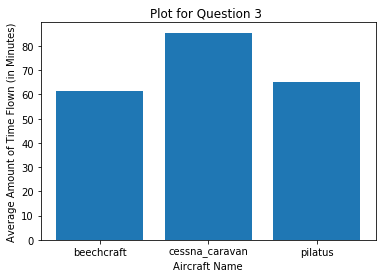

In [20]:
####Plotting####
final_df=main_df2.groupby('Aircraft Name')[['time_in_minutes']].mean()

plt.bar(final_df.index, final_df.time_in_minutes)
plt.ylabel('Average Amount of Time Flown (in Minutes)')
plt.xlabel("Aircraft Name")
plt.title('Plot for Question 3 ')
plt.show()